# Feature Selection - Decision Tree Classifier
- This notebook will explore different architectures and hyperparameters of the **Support Vector Machine Classifier** looking for an optimal configuration. In this case, the Dataset with **feature-selection dimensionality reduction** will be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Authors
- Izquierdo Alvarez, Mario
- Giménez López, Antonio
- Romero Romero, Martín
- Núñez Sánchez, Fernando

## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [1]:
using Random
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
seed = 42
Random.seed!(seed)

TaskLocalRNG()

In [2]:
using HDF5
using Preprocessing
using ModelSelection
using Plotting
using Sk_Modeling

[ Info: Precompiling Sk_Modeling [top-level]
[ Info: Skipping precompilation since __precompile__(false). Importing Sk_Modeling [top-level].


## Loading data
- The dataset used in this notebook has been reduced using Feature Selection, using the correlation of the different features with the class as the selection criterion.

The selected features are:
1. RAM
2. Battery Power
3. Screen Height
4. Screen Width  

In [3]:
file = h5open("fs_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [4]:
model = :SVM
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = []

Any[]

In [5]:
# Define an array of hyperparameter dictionaries for the SVM model
hyperparameters = [
    Dict(:kernel => "rbf", :degree => 3, :gamma => 2, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 3, :gamma => 2, :C => 1, :random_state => seed),
    Dict(:kernel => "sigmoid", :degree => 3, :gamma => 2, :C => 1, :random_state => seed),
    Dict(:kernel => "linear", :degree => 3, :gamma => 2, :C => 1, :random_state => seed),
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4

----- acc means -----
Hyperparams set 4 -> 0.949 ± 0.015
Hyperparams set 1 -> 0.946 ± 0.016
Hyperparams set 2 -> 0.945 ± 0.016
Hyperparams set 3 -> 0.109 ± 0.025

----- sensitivity means -----
Hyperparams set 4 -> 0.949 ± 0.015
Hyperparams set 1 -> 0.946 ± 0.016
Hyperparams set 2 -> 0.945 ± 0.016
Hyperparams set 3 -> 0.109 ± 0.025

----- specificity means -----
Hyperparams set 4 -> 0.983 ± 0.005
Hyperparams set 1 -> 0.982 ± 0.005
Hyperparams set 2 -> 0.982 ± 0.005
Hyperparams set 3 -> 0.712 ± 0.032

----- ppv means -----
Hyperparams set 4 -> 0.951 ± 0.014
Hyperparams set 2 -> 0.947 ± 0.015
Hyperparams set 1 -> 0.947 ± 0.015
Hyperparams set 3 -> 0.341 ± 0.148

----- npv means -----
Hyperparams set 4 -> 0.982 ± 0.006
Hyperparams set 2 -> 0.981 ± 0.006
Hyperparams set 1 -> 0.981 ± 0.006
Hyperparams set 3 -> 0.68 ± 0.017

----- f_score

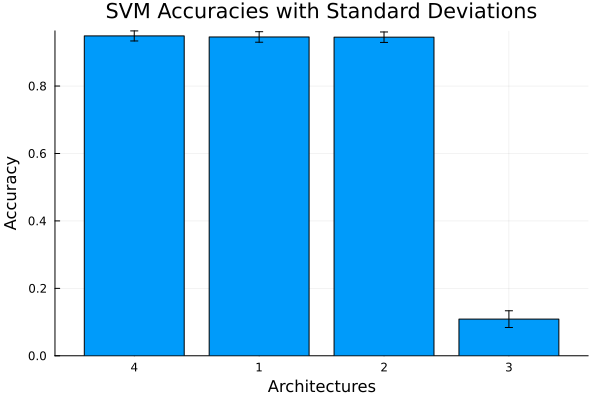

In [6]:
plot_acc_comparison(model, all_metrics)

## Discussion

After having tested the four types of kernels, it has been discovered that all of them have a really nice accuracy ratio, apart from the sigmoid one.

With all of these 3, the algorithm obtains 0.946 ± 0.016 of accuracy.

Now, we will test different degrees of the polinomial kernel to get the optimal value


In [7]:
# Define an array of hyperparameter dictionaries for the SVM model
hyperparameters = [
    Dict(:kernel => "poly", :degree => 2, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 3, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 4, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 5, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 6, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 7, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 8, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 9, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 10, :C => 1, :random_state => seed),
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8
Training with set of hyperparameters 9

----- acc means -----
Hyperparams set 1 -> 0.957 ± 0.017
Hyperparams set 2 -> 0.947 ± 0.024
Hyperparams set 3 -> 0.946 ± 0.02
Hyperparams set 4 -> 0.941 ± 0.015
Hyperparams set 5 -> 0.936 ± 0.015
Hyperparams set 6 -> 0.927 ± 0.015
Hyperparams set 7 -> 0.914 ± 0.023
Hyperparams set 8 -> 0.911 ± 0.018
Hyperparams set 9 -> 0.906 ± 0.024

----- sensitivity means -----
Hyperparams set 1 -> 0.957 ± 0.017
Hyperparams set 2 -> 0.948 ± 0.024
Hyperparams set 3 -> 0.946 ± 0.02
Hyperparams set 4 -> 0.941 ± 0.015
Hyperparams set 5 -> 0.936 ± 0.015
Hyperparams set 6 -> 0.927 ± 0.015
Hyperparams set 7 -> 0.914 ± 0.023
Hyperparams set 8 -> 0.911 ± 0.018
Hy

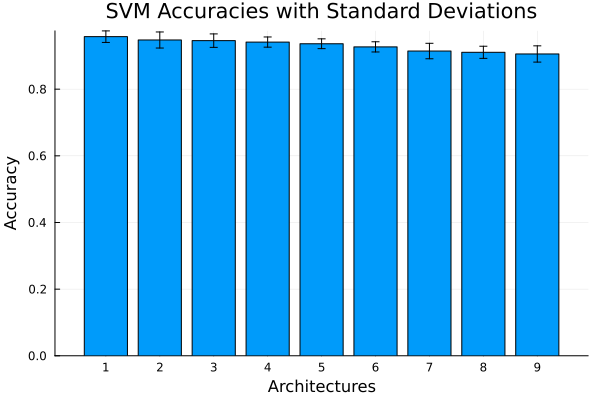

In [8]:
plot_acc_comparison(model, all_metrics)

### Discussion

In these experiments, it has beem concluded that the best degree of polynomial function is 2. As it can been observed in the graph, as we increases the number of degree the accuracy rate is reduced.

Now, we will try with linear and poly of degree 2, different values of C, to determine the optimal value of regularization.

In [9]:
# Define an array of hyperparameter dictionaries for the SVM model
hyperparameters = [
    Dict(:kernel => "poly", :degree => 2, :C => 0.1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 3, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 5, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 10, :random_state => seed),
    Dict(:kernel => "linear", :C => 0.1, :random_state => seed),
    Dict(:kernel => "linear", :C => 1, :random_state => seed),
    Dict(:kernel => "linear", :C => 3, :random_state => seed),
    Dict(:kernel => "linear", :C => 5, :random_state => seed),
    Dict(:kernel => "linear", :C => 10, :random_state => seed),
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8
Training with set of hyperparameters 9
Training with set of hyperparameters 10

----- acc means -----
Hyperparams set 2 -> 0.957 ± 0.017
Hyperparams set 9 -> 0.957 ± 0.014
Hyperparams set 10 -> 0.957 ± 0.017
Hyperparams set 8 -> 0.953 ± 0.013
Hyperparams set 4 -> 0.951 ± 0.018
Hyperparams set 3 -> 0.95 ± 0.02
Hyperparams set 5 -> 0.949 ± 0.018
Hyperparams set 7 -> 0.949 ± 0.015
Hyperparams set 1 -> 0.944 ± 0.015
Hyperparams set 6 -> 0.936 ± 0.022

----- sensitivity means -----
Hyperparams set 2 -> 0.957 ± 0.017
Hyperparams set 9 -> 0.957 ± 0.014
Hyperparams set 10 -> 0.957 ± 0.017
Hyperparams set 8 -> 0.953 ± 0.013
Hyperparams set 4 -> 0.951 ± 0.018
Hyperparams set 3 -> 0.95 ± 0.

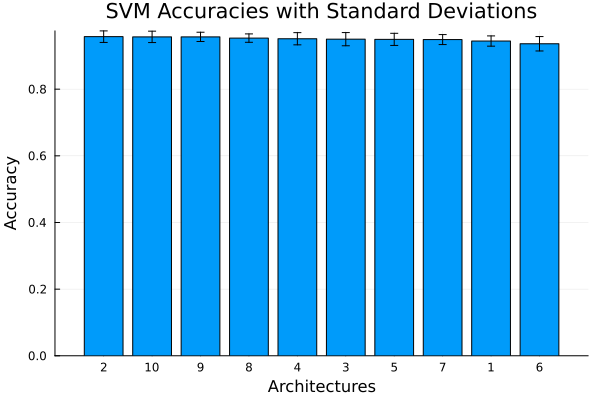

In [10]:
plot_acc_comparison(model, all_metrics)

The two kerneks have a nice performance. Regarding the polynomial kernel, we see that regular values of C get the better accuracy rate, while for the linear kernel it can be seen that high values of C yields to the better results. This leads us to conclude that the linear kernel benefits more from less regularized approaches, while the polynomial kernel needs defaults values of these parameter.

Finally, we will try to find the optimal value of C for both models.

### Discussion

In [11]:
# Define an array of hyperparameter dictionaries for the SVM model
hyperparameters = [
    Dict(:kernel => "poly", :degree => 2, :C => 0.6, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 0.8, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 1, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 1.2, :random_state => seed),
    Dict(:kernel => "poly", :degree => 2, :C => 1.4, :random_state => seed),
    Dict(:kernel => "linear", :C => 7, :random_state => seed),
    Dict(:kernel => "linear", :C => 8, :random_state => seed),
    Dict(:kernel => "linear", :C => 9, :random_state => seed),
    Dict(:kernel => "linear", :C => 10, :random_state => seed),
    Dict(:kernel => "linear", :C => 12, :random_state => seed),
    Dict(:kernel => "linear", :C => 15, :random_state => seed),
]


# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8
Training with set of hyperparameters 9
Training with set of hyperparameters 10
Training with set of hyperparameters 11

----- acc means -----
Hyperparams set 7 -> 0.958 ± 0.016
Hyperparams set 8 -> 0.958 ± 0.016
Hyperparams set 3 -> 0.957 ± 0.017
Hyperparams set 4 -> 0.957 ± 0.017
Hyperparams set 9 -> 0.957 ± 0.017
Hyperparams set 6 -> 0.956 ± 0.016
Hyperparams set 2 -> 0.956 ± 0.015
Hyperparams set 11 -> 0.956 ± 0.018
Hyperparams set 10 -> 0.956 ± 0.018
Hyperparams set 5 -> 0.955 ± 0.018
Hyperparams set 1 -> 0.951 ± 0.014

----- sensitivity means -----
Hyperparams set 7 -> 0.958 ± 0.016
Hyperparams set 8 -> 0.957 ± 0.016
Hyperparams set 3 -> 0.957 ± 0.017
Hyperparams set 4 -> 0.

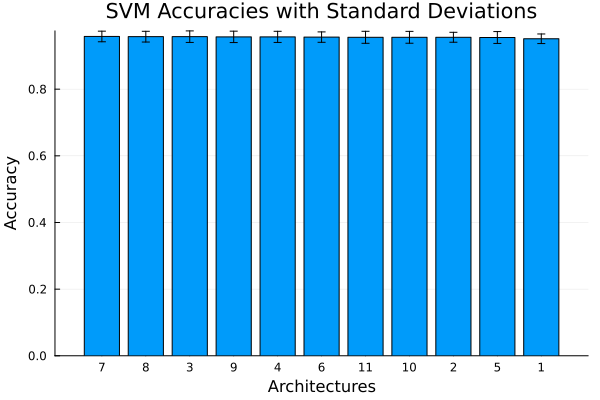

In [12]:
plot_acc_comparison(model, all_metrics)

## Final discussion

Finally, it has been found out that the best set of hyperparameters are:

1. **Kernel**: Linear
2. **C**: 8

This result in an **accuracy** of **0.958 ± 0.016**.

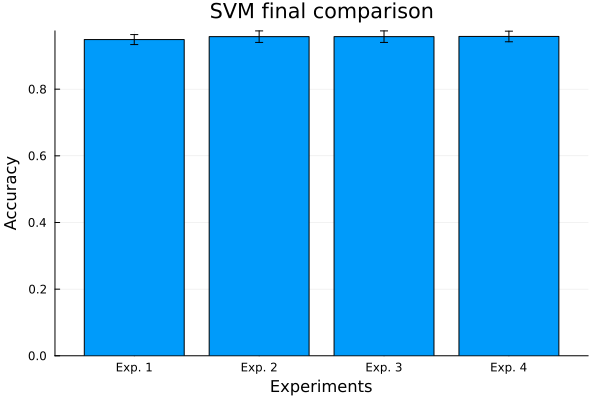

In [13]:
plot_final_comparison("SVM final comparison", best_models_acc)